# GLUE
General Language Understanding Evaluation benchmark (https://gluebenchmark.com/) is a collection of resources for training, evaluating, and analyzing natural language understanding systems.

Supported Tasks and Leaderboards
The leaderboard for the GLUE benchmark can be found at this address. It comprises the following tasks:
# cola
The Corpus of Linguistic Acceptability consists of English acceptability judgments drawn from books and journal articles on linguistic theory. Each example is a sequence of words annotated with whether it is a grammatical English sentence.
# mrpc
The Microsoft Research Paraphrase Corpus (Dolan & Brockett, 2005) is a corpus of sentence pairs automatically extracted from online news sources, with human annotations for whether the sentences in the pair are semantically equivalent.
# sst2
The Stanford Sentiment Treebank consists of sentences from movie reviews and human annotations of their sentiment. The task is to predict the sentiment of a given sentence. It uses the two-way (positive/negative) class split, with only sentence-level labels.

# Install necessary libs

In [5]:
!pip install datasets transformers matplotlib seaborn -q

You should consider upgrading via the '/home/guskov/venv/bin/python -m pip install --upgrade pip' command.


# Import

In [1]:

from datasets import load_dataset
from datasets import ClassLabel, Sequence
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter('ignore') 

%matplotlib inline

# Utils

In [22]:
def dt_to_pd(dataset):
    """
    Сonvert from Dataset type to DataFrame.
    """
    df = pd.DataFrame(dataset)
    for column, typ in dataset.features.items():
        if isinstance(typ, ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
        elif isinstance(typ, Sequence) and isinstance(typ.feature, ClassLabel):
            df[column] = df[column].transform(lambda x: [typ.feature.names[i] for i in x])
    return df
def class_balances(datasets):
    """
    Plot distribution of class labels
    @params datasets (list): array containing all parts [train, val, test] of the dataset
    """
    fig, axes = plt.subplots(ncols=2, nrows=len(datasets), figsize=(16, 8), dpi=100)
    data = ['Train', 'Validation']

    for i in range(len(datasets)):
        p = sns.countplot(x = datasets[i]['label'], ax=axes[i][0])
        p.set(ylabel = data[i], xlabel="")
        axes[i][1].pie(datasets[i]['label'].value_counts(ascending=True),
            labels=['Negative', 'Positive'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60,
            radius = 1.2)
        
    fig.suptitle('Distribution of the class labels', fontsize=16)
    plt.show()
def word_number(textno, textye):
    """
    Plot comparing different class sentences word counts
    """
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 8),  dpi=100)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0])
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1])
    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Negative sentences')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('Positive sentences')
    
    fig.suptitle('Words Per Sentence in Train', va='baseline')
    fig.tight_layout()
def words_in_sentences(datasets, text_column='sentence'):
    """
    A function for counting word counts in sentences.
    """
    fig, axes = plt.subplots(ncols=len(datasets), nrows=1, figsize=(18, 6), dpi=100)
    
    for i in range(len(datasets)):  
        sns.histplot([len(datasets[i][text_column][j].split()) for j in range(len(datasets[i]))], 
                     ax=axes[i], 
                     multiple="stack", 
                     palette="Blues_r", 
                     edgecolor=".3", 
                     linewidth=.5,)
        axes[i].set_xlabel("Number of words in sentence")
        axes[0].set_ylabel("Number of samples")

    fig.suptitle("Sentence Length Distribution", va='baseline', fontsize=15)
    axes[0].set_title("Train")
    axes[1].set_title("Validation")
    axes[2].set_title("Test")

    plt.show()
def max_sentence_len(data, text_column='sentence'):
    """
    Calculating the maximum sentence length in the data
    @params data (list): array containing all parts [train, val, test] of the dataset
    """
    max_snt = []
    for i in range(len(data)):
        max_snt.append(max([len(data[i][text_column][j].split()) for j in range(len(data[i]))]))
        
    return max(max_snt)    

# Lets explore dataset GLUE SST-2

Download dataset from huggingface

In [23]:
train_dataset = load_dataset('glue', 'sst2', split='train')
valid_dataset = load_dataset('glue', 'sst2', split='validation')
test_dataset = load_dataset('glue', 'sst2', split='test')

Found cached dataset glue (/home/guskov/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)
Found cached dataset glue (/home/guskov/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)
Found cached dataset glue (/home/guskov/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


In [24]:
print("Length of datasets:")
print(f"Train: {len(train_dataset)}", f"Valid: {len(valid_dataset)}", f"Test:  {len(test_dataset)}", sep = '\n')

Length of datasets:
Train: 67349
Valid: 872
Test:  1821


let's translate the data into a DataFrame.

In [25]:
df_train = dt_to_pd(train_dataset)
df_valid = dt_to_pd(valid_dataset)
df_test = dt_to_pd(test_dataset)

In [26]:
data_nums = [df_train, df_valid]

In [27]:
print("Number of NULL labels in data:")
print(f"Train: {df_train['label'].isnull().sum()}", f"Valid: {df_valid['label'].isnull().sum()}", f"Test:  {df_test['label'].isnull().sum()}", sep = '\n')

Number of NULL labels in data:
Train: 0
Valid: 0
Test:  0


In [28]:
data_nums[0]['label'].value_counts(ascending=True)

negative    29780
positive    37569
Name: label, dtype: int64

In [29]:
print(data_nums[0].shape)
print(data_nums[1].shape)

(67349, 3)
(872, 3)


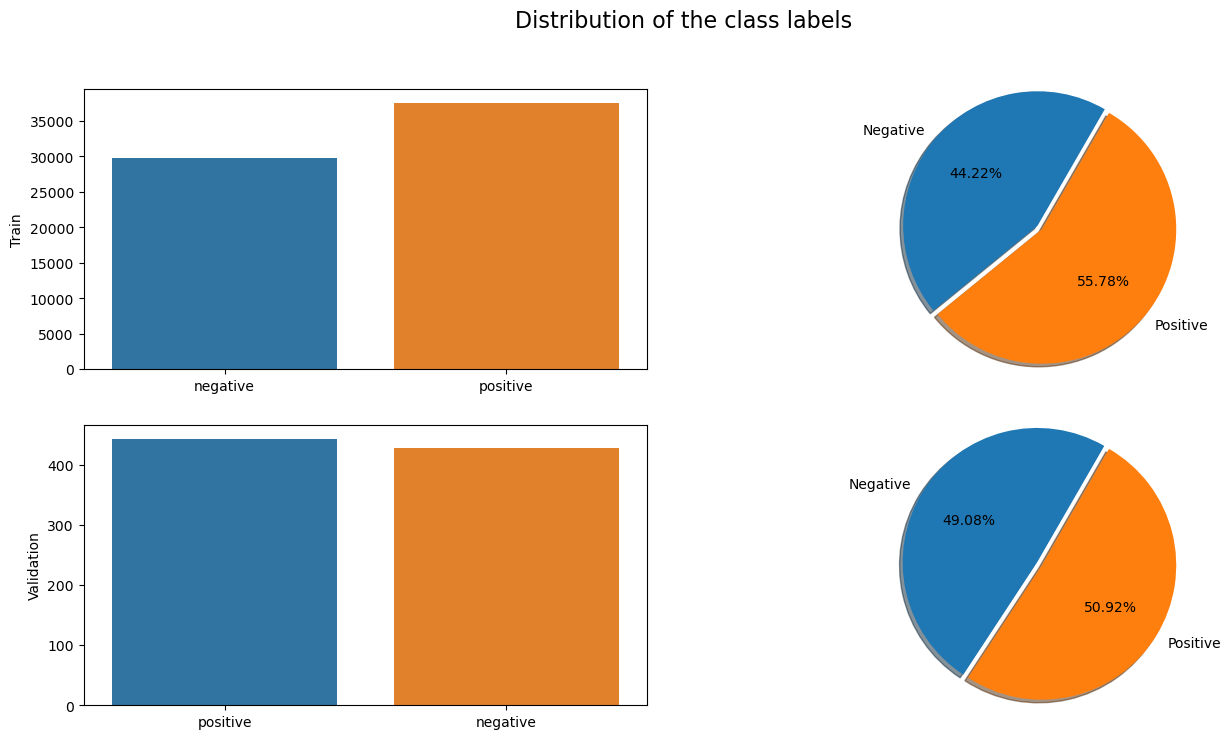

In [30]:
class_balances(data_nums)

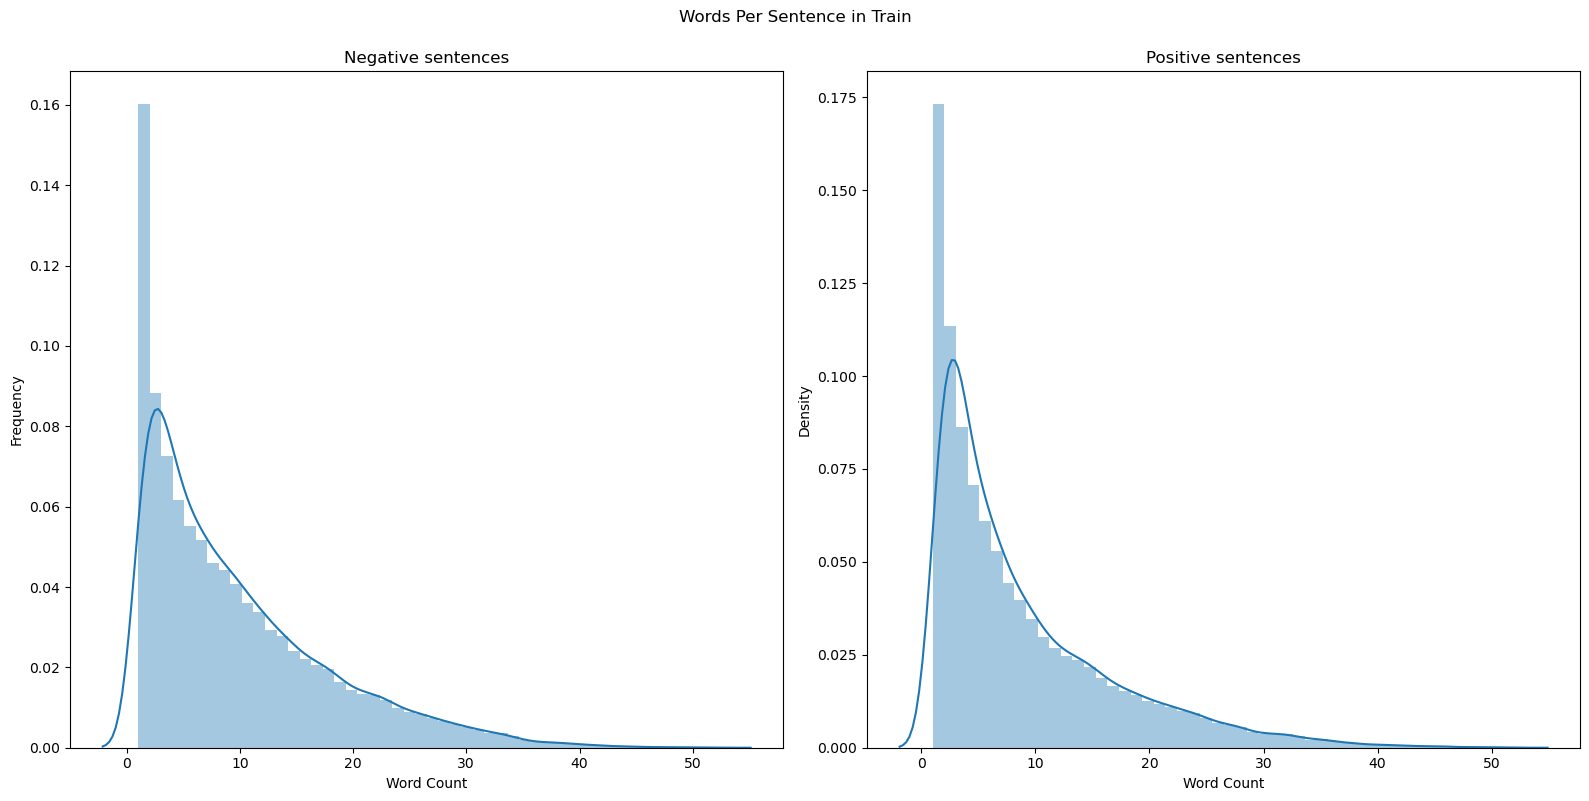

In [31]:
word_number(df_train[df_train['label'] == 'negative']['sentence'],
            df_train[df_train['label'] == 'positive']['sentence'])

According to the distribution of the number of words in the sentences corresponding to the different classes, we can notice that most of the sentences in train data don't exceed 20 characters.

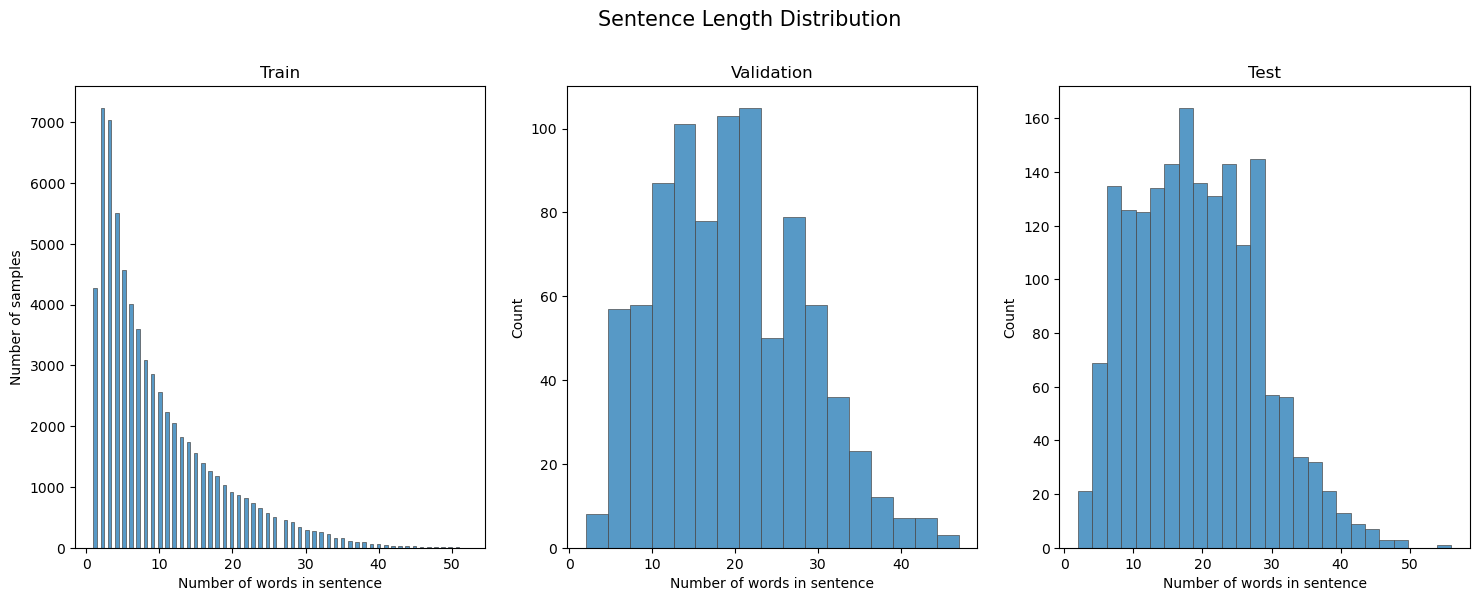

In [32]:
data_nums = [df_train, df_valid, df_test]
words_in_sentences(data_nums)

In [33]:
max_len = max_sentence_len(data_nums)
print("Max sentence length:", max_len)

Max sentence length: 56


# CoLA
The Corpus of Linguistic Acceptability dataset for single sentence classification. It's a set of sentences labeled as grammatically correct or incorrect. It was first published in May of 2018, and is one of the tests included in the "GLUE Benchmark" on which models like BERT are competing.

In [34]:
train_dataset = load_dataset('glue', 'cola', split='train')
valid_dataset = load_dataset('glue', 'cola', split='validation')
test_dataset = load_dataset('glue', 'cola', split='test')

Found cached dataset glue (/home/guskov/.cache/huggingface/datasets/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)
Found cached dataset glue (/home/guskov/.cache/huggingface/datasets/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)
Found cached dataset glue (/home/guskov/.cache/huggingface/datasets/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


In [35]:
print("Length of datasets:")
print(f"Train: {len(train_dataset)}", f"Valid: {len(valid_dataset)}", f"Test:  {len(test_dataset)}", sep = '\n')

Length of datasets:
Train: 8551
Valid: 1043
Test:  1063


In [36]:
df_train = dt_to_pd(train_dataset)
df_valid = dt_to_pd(valid_dataset)
df_test = dt_to_pd(test_dataset)

In [37]:
data_nums = [df_train, df_valid]

In [38]:
df_train.sample(10)

,sentence,label,idx
272,"We gave every senator enough opportunity and, ...",unacceptable,272
1443,Did his having played the piano surprise you?,acceptable,1443
3802,I sent a surprise present to John.,acceptable,3802
875,"Mary questioned Joe's desire to eat cabbage, b...",unacceptable,875
5988,Calvin did not do a back flip.,acceptable,5988
8019,Jason expected Medea to be treated by the doctor,acceptable,8019
5829,Peter said that Danny danced.,acceptable,5829
3038,Anne met with Cathy.,acceptable,3038
5985,Megan was sat on by her brother.,acceptable,5985
3194,Brutus murdered Julius Caesar with a dagger.,acceptable,3194


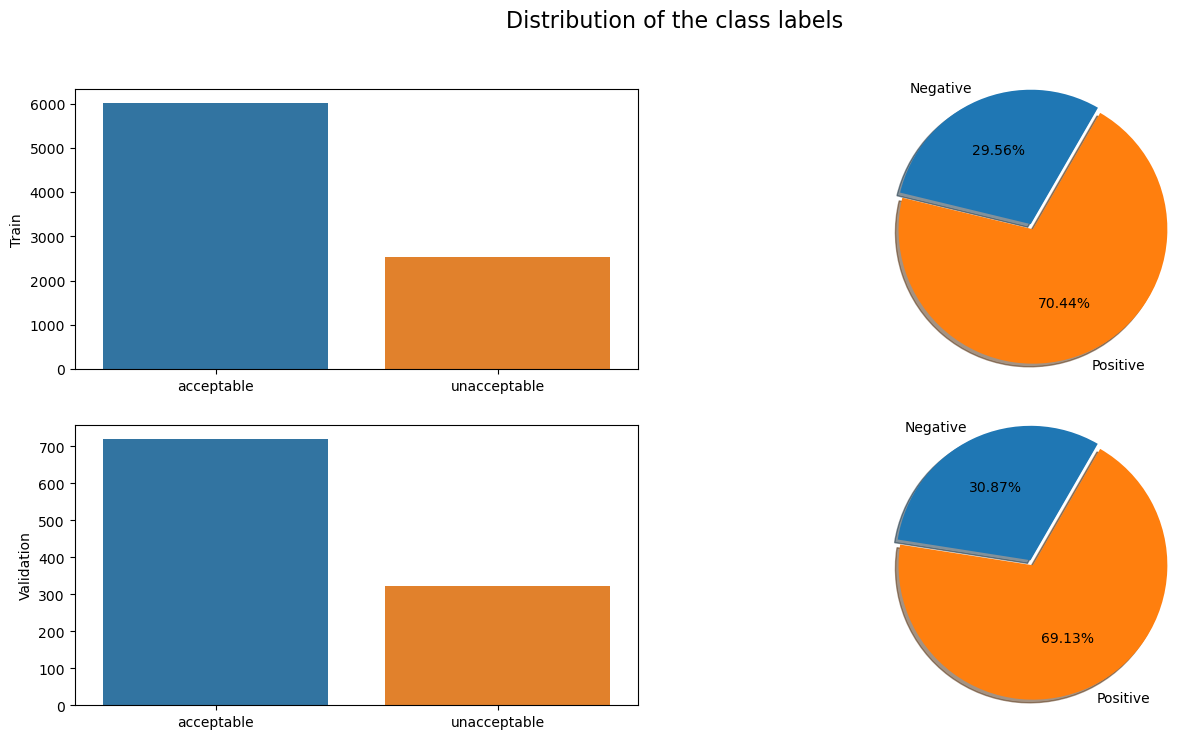

In [39]:
class_balances(data_nums)

Our classes are unbalanced, which means that we may get unrepresentative data and not valid classifier results.

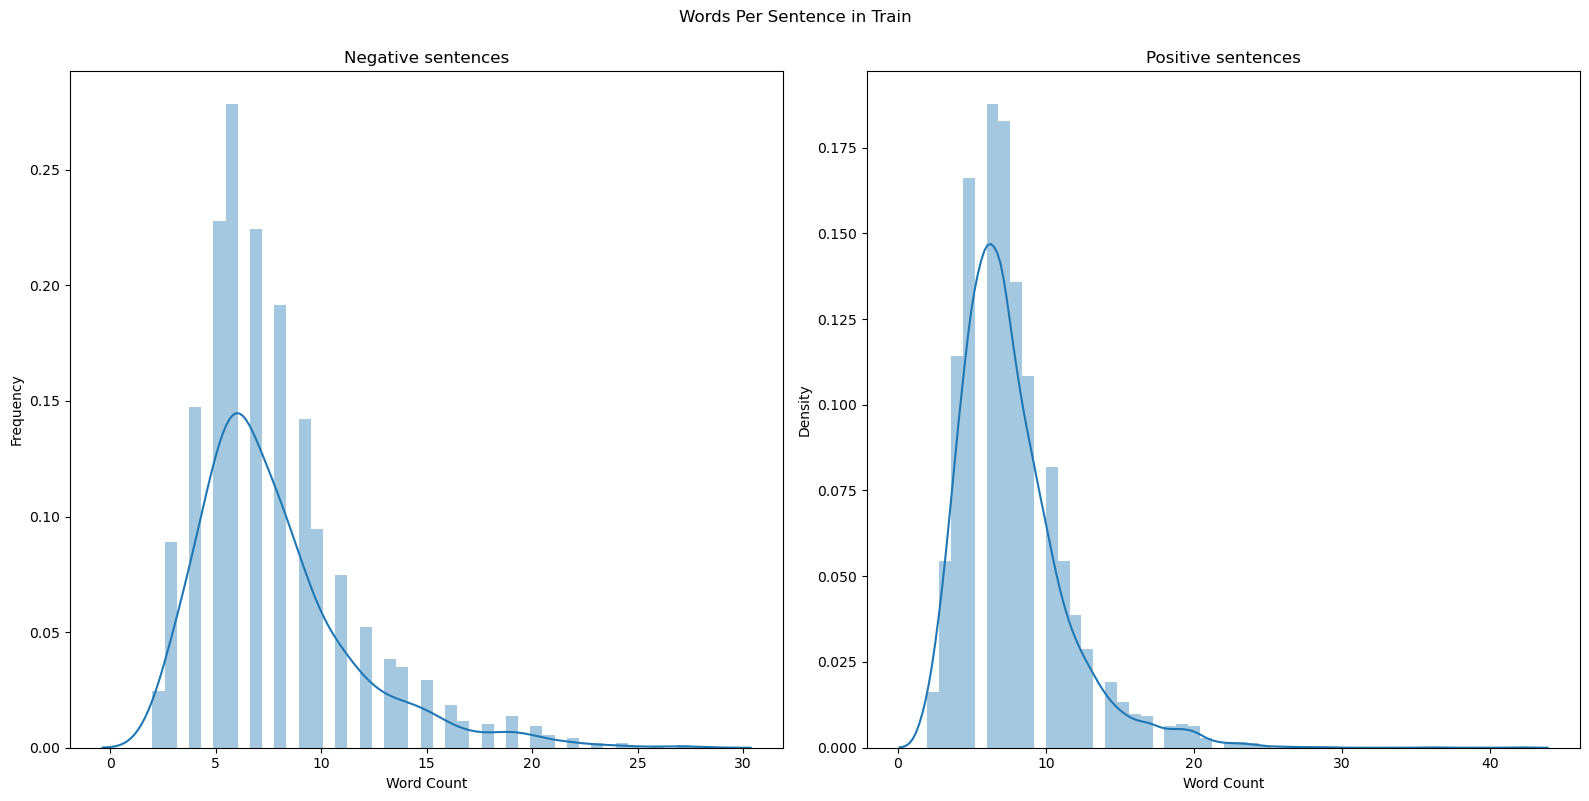

In [40]:
word_number(df_train[df_train['label'] == 'unacceptable']['sentence'],
            df_train[df_train['label'] == 'acceptable']['sentence'])

According to the distribution of the number of words in the sentences corresponding to the different classes, we can notice that most of the sentences in train data don't exceed 20 characters.

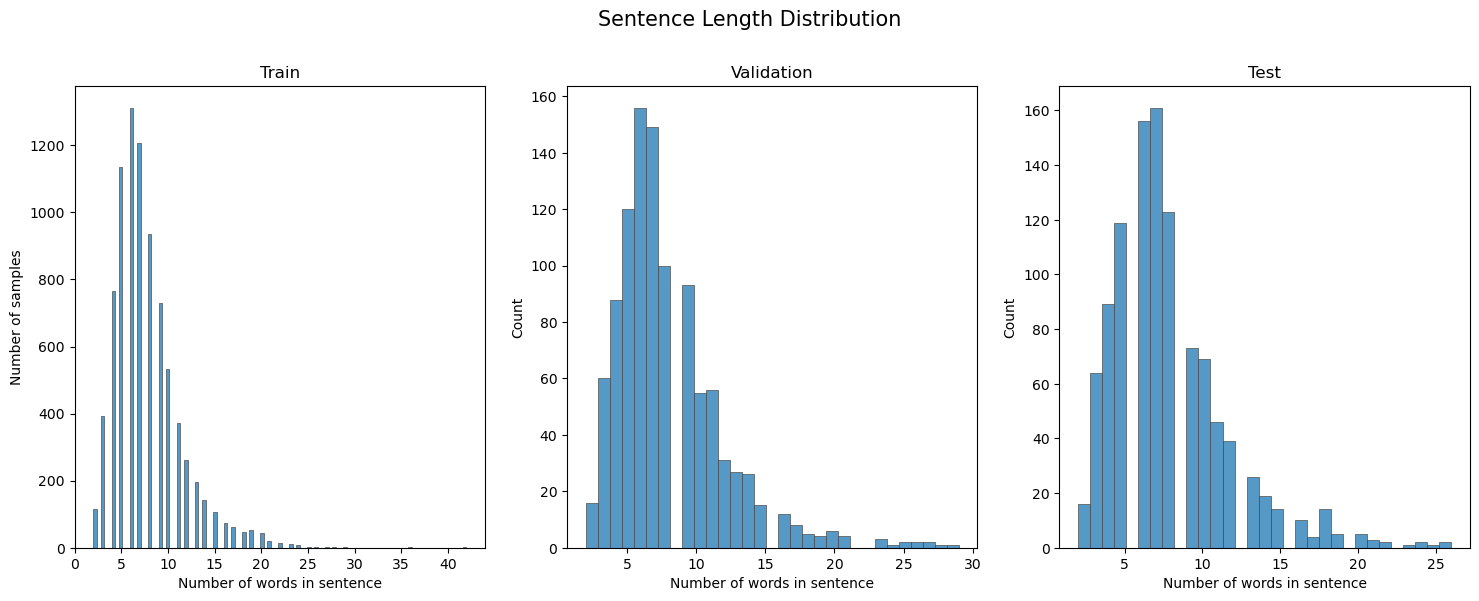

In [41]:
data_nums = [df_train,df_valid,df_test]
words_in_sentences(data_nums)

In [42]:
max_len = max_sentence_len(data_nums)
print("Max sentence length:", max_len)

Max sentence length: 42


Maximum length will be required for tokenizing sentences. The model can only accept fixed length sentences as input, we will add short sentences with <PAD>.

In [43]:
train_dataset = load_dataset('glue', 'mrpc', split='train')
valid_dataset = load_dataset('glue', 'mrpc', split='validation')
test_dataset = load_dataset('glue', 'mrpc', split='test')

Found cached dataset glue (/home/guskov/.cache/huggingface/datasets/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)
Found cached dataset glue (/home/guskov/.cache/huggingface/datasets/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)
Found cached dataset glue (/home/guskov/.cache/huggingface/datasets/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


In [44]:
print("Length of datasets:")
print(f"Train: {len(train_dataset)}", f"Valid: {len(valid_dataset)}", f"Test:  {len(test_dataset)}", sep = '\n')

Length of datasets:
Train: 3668
Valid: 408
Test:  1725


In [45]:
df_train = dt_to_pd(train_dataset)
df_valid = dt_to_pd(valid_dataset)
df_test = dt_to_pd(test_dataset)

In [46]:
data_nums = [df_train, df_valid]

In [47]:
df_train.sample(10)

,sentence1,sentence2,label,idx
128,"Ms. Haque , meanwhile , was on her turquoise c...","Fatima , meanwhile , was on her turquoise cell...",equivalent,146
316,The test was conducted by the University of Ca...,"The test , conducted by UCLA and UC Riverside ...",equivalent,347
444,Roberson was bitten on the back and scratched ...,She was bitten on the back and scratched on th...,equivalent,495
2858,The Federal Open Market Committee meeting gets...,The Federal Open Market Committee will end its...,equivalent,3172
2452,Token-issuing framework provides capabilities ...,"Within WSE 2.0 , WS-Trust , WS-SecureConversat...",equivalent,2726
3219,"Druce will face murder charges , Conte said .",Conte said Druce will be charged with murder .,equivalent,3578
327,The euro tagged another record high against th...,The euro ros further into record territory on ...,not_equivalent,360
772,Mr. Brendsel is expected to remain with the Fr...,Freddie expects Brendsel to continue serving a...,equivalent,866
691,Lee Peterson testified that he reached his son...,Lee said he reached Scott on his cell phone an...,equivalent,774
640,"The FCC said existing televisions , VCRs , DVD...","It also required that existing televisions , V...",equivalent,721


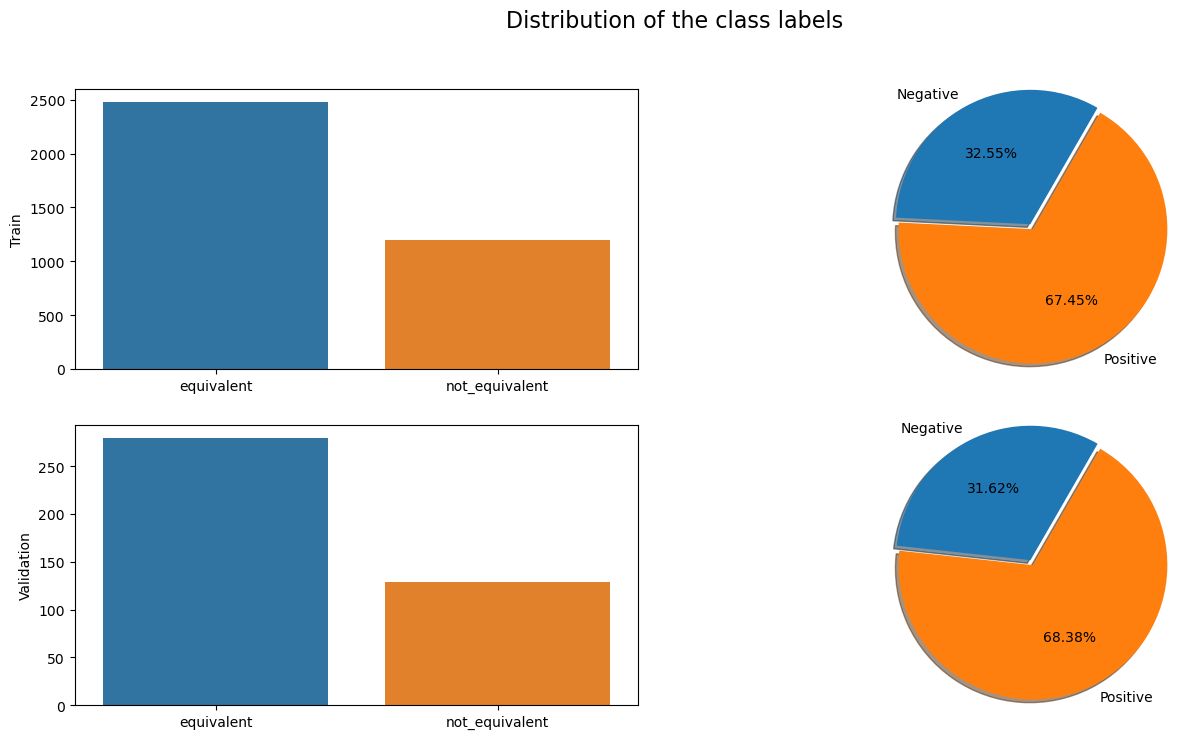

In [48]:
# Because the classes are imbalanced (68% positive), 
# we follow common practice and report both accuracy and F1 score.
class_balances(data_nums)

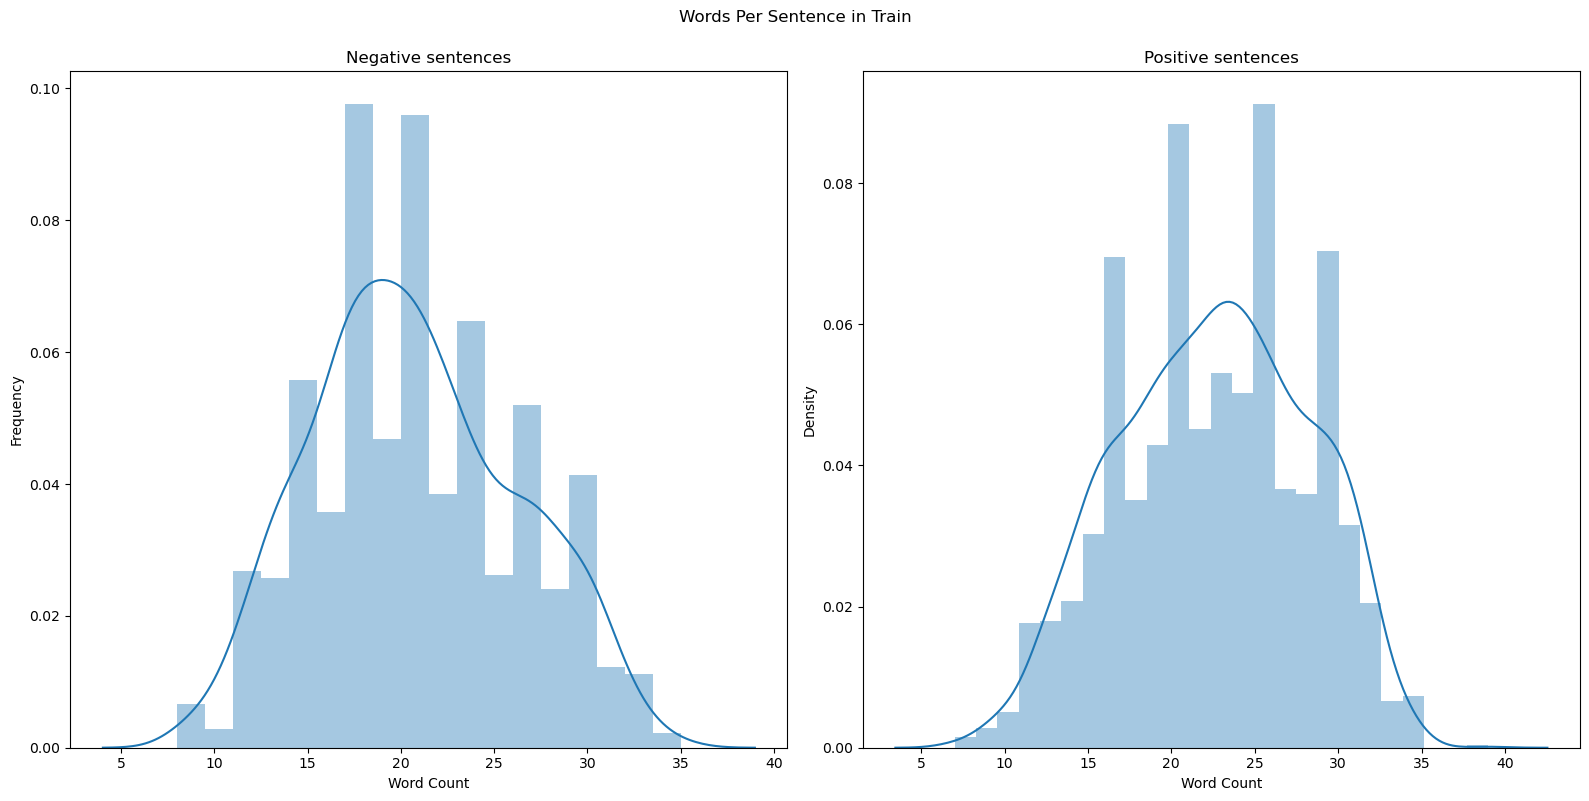

In [49]:
word_number(df_train[df_train['label'] == 'not_equivalent']['sentence1'],
            df_train[df_train['label'] == 'equivalent']['sentence1'])

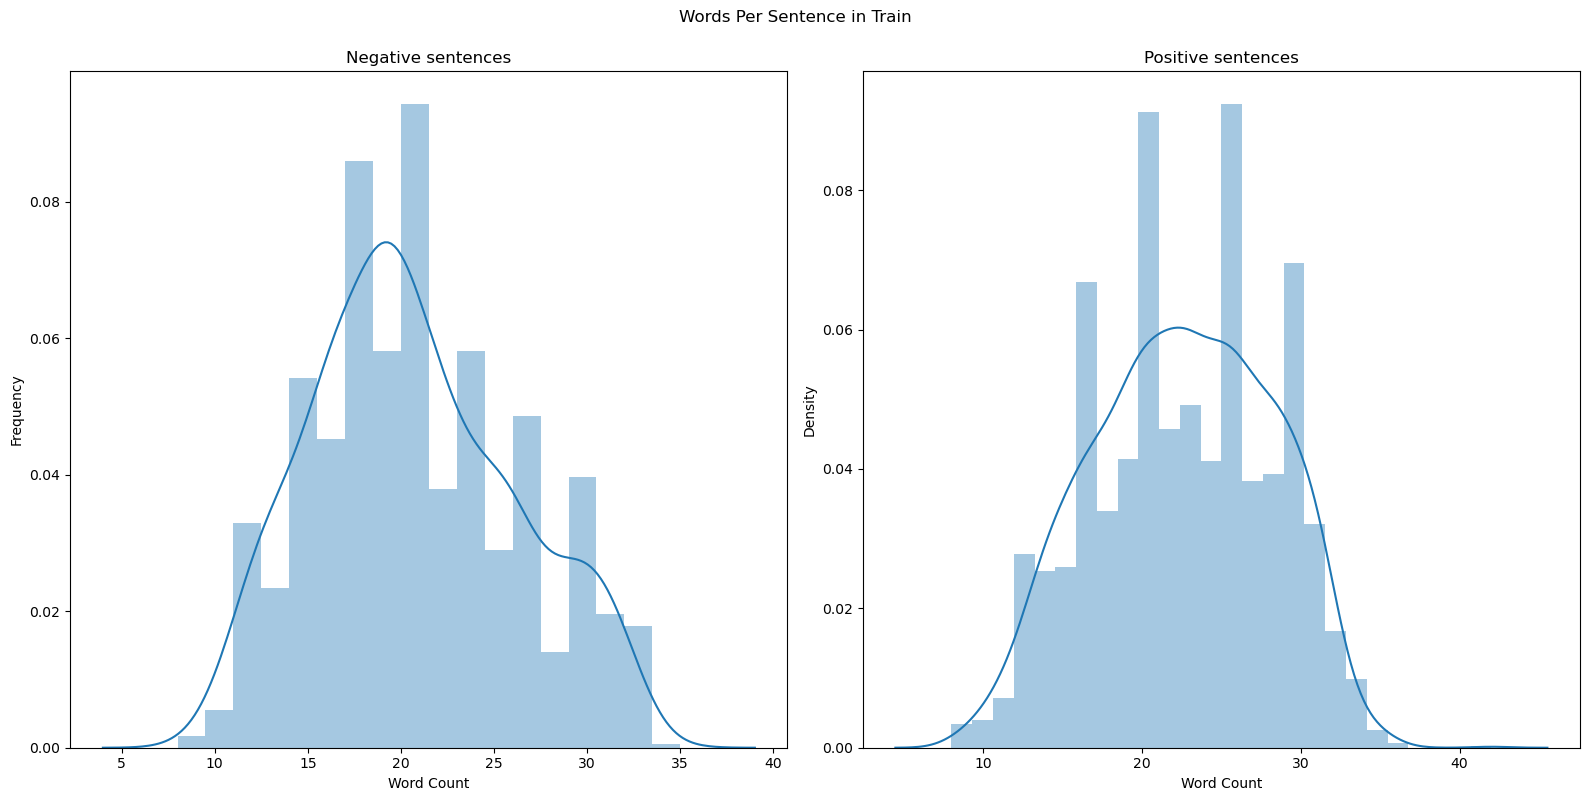

In [50]:
word_number(df_train[df_train['label'] == 'not_equivalent']['sentence2'],
            df_train[df_train['label'] == 'equivalent']['sentence2'])

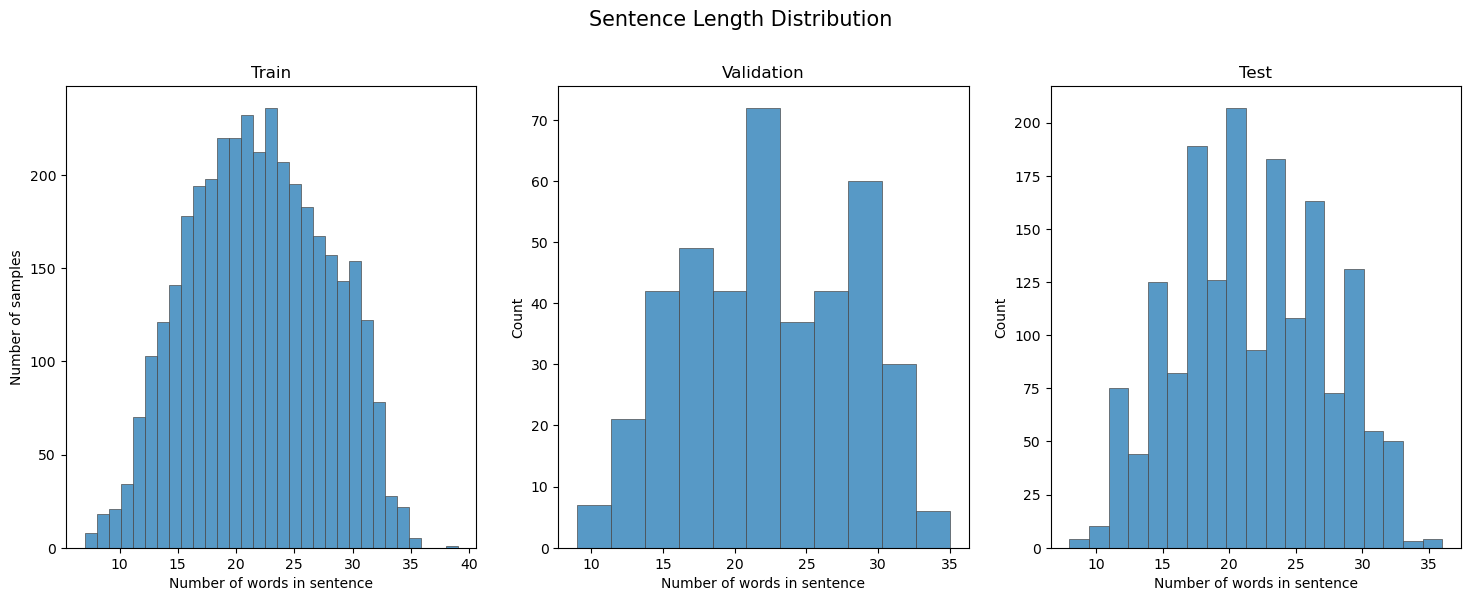

In [51]:
data_nums = [df_train,df_valid,df_test]
words_in_sentences(data_nums,text_column='sentence1')

In [52]:
max_len = max_sentence_len(data_nums,text_column='sentence1')
print("Max sentence length:", max_len)

Max sentence length: 39
